In [251]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

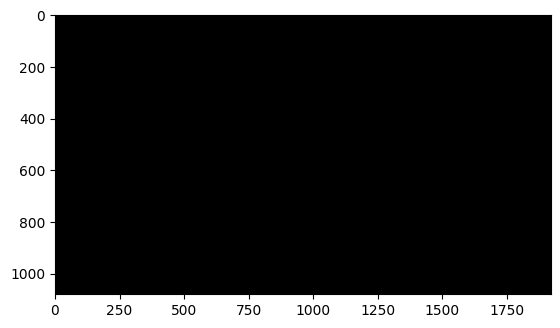

In [252]:
res = (1080, 1920)
empty_img = np.zeros(res, dtype=np.uint8)
plt.imshow(empty_img, cmap='gray')

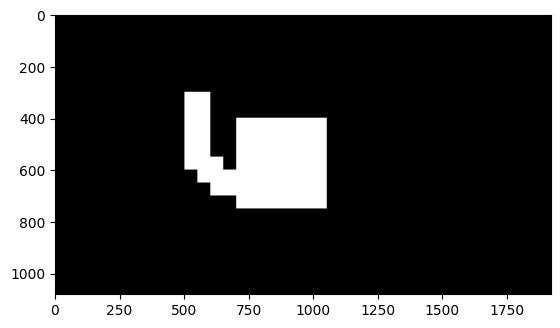

In [253]:
#create binary mask blob
mask1 = np.zeros_like(empty_img)
mask1[300:600, 500:600] = 1

mask2 = np.zeros_like(empty_img)
mask2[550:650, 550:650] = 1

mask3 = np.zeros_like(empty_img)
mask3[600:700, 600:730] = 1

mask4 = np.zeros_like(empty_img)
mask4[400:750, 700:1050] = 1


outlier_mask = np.zeros_like(empty_img)
outlier_mask[0:100, 0:100] = 1



mask = cv2.bitwise_or(cv2.bitwise_or(mask3, mask4), cv2.bitwise_or(mask1, mask2))

plt.imshow(mask, cmap='gray')

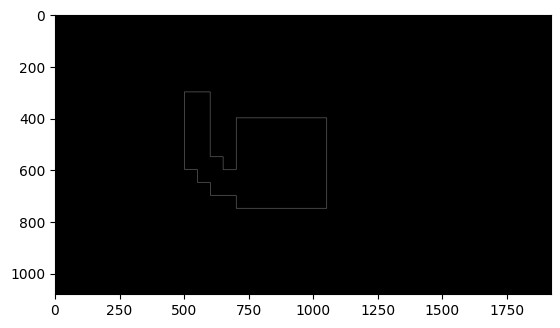

In [254]:
border = np.zeros_like(mask)
rows, cols = mask.shape

for i in range(rows):
    for j in range(cols):
        if (j == 0 or j == cols-1) or (i == 0 or i == rows-1):
            if mask[i, j]:
                border[i, j] = 1
        
        elif mask[i, j] and not all((mask[i, j-1], mask[i, j+1], mask[i+1, j], mask[i-1, j])):
            border[i, j] = 1


plt.imshow(border, cmap='gray')

# Smarter way?

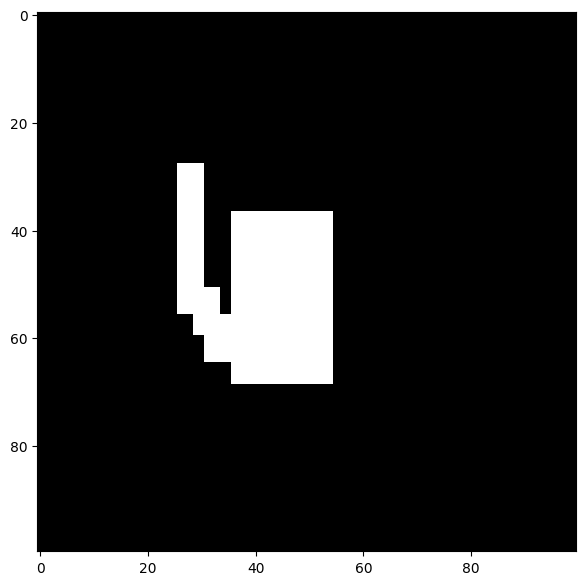

In [255]:
mask = cv2.resize(mask, (100, 100))
plt.figure(figsize = (7, 7))
plt.imshow(mask, cmap='gray')

## pad, shift in all directions, && and subtract, then add the 4 results

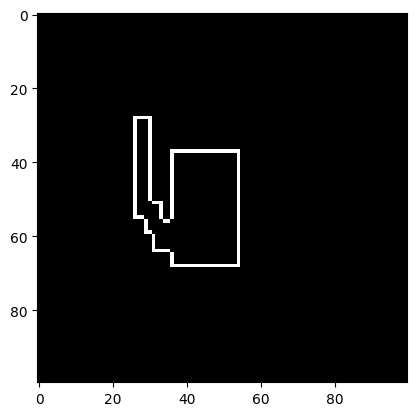

In [256]:


mask_pad = np.pad(mask, 1, mode='edge')
res = np.clip(mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, 1, 0)) + \
              mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, -1, 0)) + \
              mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, 1, 1)) + \
              mask_pad - cv2.bitwise_and(mask_pad, np.roll(mask_pad, -1, 1)), \
              a_min = 0, a_max = 1)[1:-1, 1:-1]

plt.imshow(res, cmap='gray')